## Importing the required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
# Importing the dataset

df = pd.read_csv('naukri.csv')

In [4]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [5]:
df.shape

(22000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              21996 non-null  object 
 1   education            20004 non-null  object 
 2   experience           21996 non-null  object 
 3   industry             21995 non-null  object 
 4   jobdescription       21996 non-null  object 
 5   jobid                22000 non-null  int64  
 6   joblocation_address  21499 non-null  object 
 7   jobtitle             22000 non-null  object 
 8   numberofpositions    4464 non-null   float64
 9   payrate              21903 non-null  object 
 10  postdate             21977 non-null  object 
 11  site_name            3987 non-null   object 
 12  skills               21472 non-null  object 
 13  uniq_id              22000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.3+ MB


In [7]:
# Dropping the coloumns with irrelevent information
drop = ['jobdescription','jobid','site_name','uniq_id','jobtitle','postdate']
df = df.drop(columns=drop)

In [8]:
df.head()

,company,education,experience,industry,joblocation_address,numberofpositions,payrate,skills
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Chennai,NaN,"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Chennai,60.0,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Bengaluru,NaN,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",NaN,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Bengaluru,4.0,Not Disclosed by Recruiter,IT Software - Application Programming


In [9]:
df.isnull().sum()

company                    4
education               1996
experience                 4
industry                   5
joblocation_address      501
numberofpositions      17536
payrate                   97
skills                   528
dtype: int64

#### Analysising the "Experience" Coloumn

In [10]:
df.experience.isnull().sum()

4

There are 4 missing values in the coloumn, so we will try to fill the missing values with the help of mode.

In [11]:
df.experience.value_counts()[:15]

2 - 7 yrs      1712
2 - 5 yrs      1231
3 - 8 yrs      1192
3 - 5 yrs      1181
5 - 10 yrs     1084
1 - 3 yrs       755
2 - 4 yrs       729
4 - 9 yrs       715
0 - 5 yrs       654
3 - 6 yrs       613
1 - 6 yrs       591
0 - 3 yrs       556
10 - 15 yrs     517
0 - 1 yrs       509
5 - 8 yrs       499
Name: experience, dtype: int64

By value_counts() function, we got to know that '2-7 yrs' is he mode of the coloumn

In [12]:
# filling the missing value with the mode of this coloumns

df.experience.fillna('2 - 7 yrs', inplace = True)

In [13]:
# Spliting the data before extracting the minimum and maximum year of experience

year_experience=df.experience.str.split(' ')

df['min_year_exp']=year_experience.apply(lambda x:x[0])

df['max_year_exp']=year_experience.apply(lambda x:x[2] if len(x)>2 else x[0])

We are taking a table of job data, separating the experience values, and creating two new columns for the minimum and maximum years of experience, assuming a minimum value is always present and using it as the maximum if not specified.

In [14]:
# counts and shows how many times each different minimum years of experience appears in the DataFrame column "min_year_exp

df['min_year_exp'].value_counts()

2      4534
3      3497
1      2733
0      2603
5      2174
4      1995
6      1030
10      991
8       830
7       698
12      214
9       206
15      201
Not     111
11       48
13       41
14       41
20       19
18       15
16       11
17        5
23        1
25        1
26        1
Name: min_year_exp, dtype: int64

In our data there are some rows with value "Not" that need to be replaced ,so we will see the whole row with value "Not" in experience coloumn before cleaning the data.

In [17]:
dirty_list=[]
for i in range(len(df)):
    if ('Not' in df.experience[i]):
        dirty_list.append(df.experience[i])
dirty_list

['Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Ment

 It's finding and collecting all the rows in the DataFrame where the "experience" column contains the value "Not" and storing them in the list dirty_list for further analysis or cleaning.

In [18]:
# Replace 'Not' with '2' as it is not mentioned

df['min_year_exp']=np.where(df.min_year_exp=='Not','2',df.min_year_exp)

df['min_year_exp'].value_counts()

2     4645
3     3497
1     2733
0     2603
5     2174
4     1995
6     1030
10     991
8      830
7      698
12     214
9      206
15     201
11      48
13      41
14      41
20      19
18      15
16      11
17       5
23       1
25       1
26       1
Name: min_year_exp, dtype: int64

In [20]:
# Need to do same with column max_year_exp

df['max_year_exp'].value_counts()

5      3720
7      2732
8      2332
6      2110
10     1823
3      1768
4      1547
9      1039
2       962
12      702
15      616
11      581
1       517
13      420
20      291
0       173
14      164
Not     111
18      104
16       72
17       68
25       50
22       36
19       20
23       13
24        9
21        7
30        6
28        4
-1        1
27        1
26        1
Name: max_year_exp, dtype: int64

In [21]:
# There are rows with value 'Not' and '-1'. We will replace value 'Not' with '7' and value '-1' with 1

df['max_year_exp']=np.where(df.max_year_exp=='Not','7',df.max_year_exp)

df['max_year_exp']=np.where(df.max_year_exp=='-1','1',df.max_year_exp)

df['max_year_exp'].value_counts()


5     3720
7     2843
8     2332
6     2110
10    1823
3     1768
4     1547
9     1039
2      962
12     702
15     616
11     581
1      518
13     420
20     291
0      173
14     164
18     104
16      72
17      68
25      50
22      36
19      20
23      13
24       9
21       7
30       6
28       4
27       1
26       1
Name: max_year_exp, dtype: int64

In [22]:
# Changing the dtype from string to integer in column min_year_exp and max_year_exp

df['min_year_exp']=df['min_year_exp'].astype(int)

df['max_year_exp']=df['max_year_exp'].astype(int)

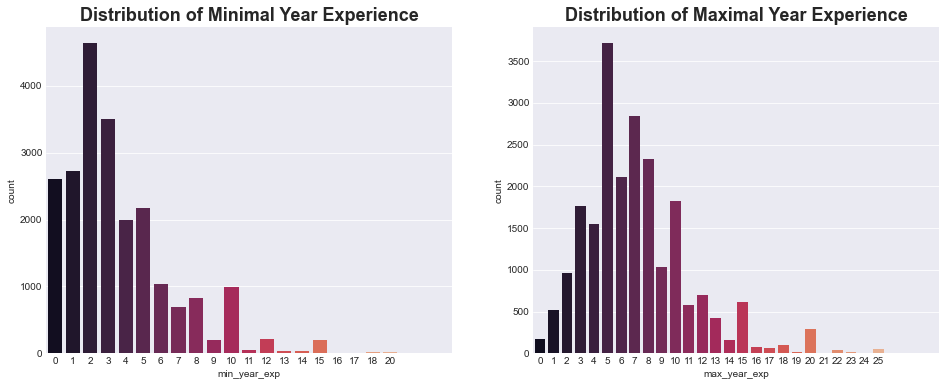

In [23]:
# We will check the distribution in both columns

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(df.min_year_exp,palette='rocket')
plt.xticks(range(0,20))
plt.title("Distribution of Minimal Year Experience",weight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(df.max_year_exp,palette='rocket')
plt.xticks(range(0,26))
plt.title("Distribution of Maximal Year Experience",weight='bold',size=18)
plt.show()


Based on the information displayed in the plot above, it is apparent that the most frequent minimum years of experience required for job openings is 2 years, while the most common maximum years of experience required is 5 years.

#### Analysising the "Education" Coloumn

In [24]:
# checking the unique education

df.education.unique()

array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
       'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
       'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
       ..., 'PG:MS/M.Sc(Science) - Any Specialization, Statistics',
       'UG: B.Tech/B.E. - Any Specialization PG:MCA - Computers, M.Tech - Any Specialization, MS/M.Sc(Science) - Any Specialization Doctorate:Doctorate Not Required',
       'UG: B.Tech/B.E. - Computers PG:MS/M.Sc(Science) - Computers Doctorate:Doctorate Not Required'],
      dtype=object)

In [25]:
# checking the missing values

df.education.isnull().sum()

1996

In [26]:
# Repalcing the missing values with 'UG: Any Graduate - Any Specialization'

df.education.fillna('UG: Any Graduate - Any Specialization', inplace = True)

We want to know the most needed Bachelor Degrees by companies for that first,we will replace "PG" and "Doctorate" with delimiter "|" so  that we can split the value with delimiter. Then we will extract the first value in the list which is Bachelor Degree required for the job

In [29]:
df_edu=df.education.apply(lambda x:x.replace(" PG:","|")).apply(lambda x:x.replace(" Doctorate:","|"))

df_edu=df_edu.apply(lambda x:x.split("|"))

df_edu=df_edu.apply(lambda x:x[0])

df_edu.value_counts()[:15]

UG: Any Graduate - Any Specialization                                      6962
UG: Any Graduate                                                           4055
UG: B.Tech/B.E.                                                            4032
UG: Any Graduate - Any Specialization, Graduation Not Required             2205
UG: B.Tech/B.E. - Any Specialization                                        753
UG: B.Tech/B.E. - Computers                                                 397
UG: B.Com                                                                   240
UG: Diploma                                                                 163
UG: B.B.A                                                                   149
UG: B.Com - Commerce                                                        148
UG: Any Graduate - Any Specialization, B.Tech/B.E. - Any Specialization     139
UG: B.Sc                                                                    110
UG: B.A                                 

From the data extracted above, we see that some data has the same meaning but has different name 
so I am going to replace it with the same name

In [30]:

df_edu=df_edu.apply(lambda x:x.replace("UG: Any Graduate - Any Specialization","UG: Any Graduate"))
df_edu=df_edu.apply(lambda x:x.replace("UG: Any Graduate - Any Specialization, Graduation Not Required","UG: Any Graduate"))
df_edu=df_edu.apply(lambda x:x.replace("UG: Any Graduate, Graduation Not Required","UG: Any Graduate"))
df_edu=df_edu.apply(lambda x:x.replace("B.Tech/B.E. - Any Specialization","UG: B.Tech/B.E."))
df_edu=df_edu.apply(lambda x:x.replace("UG: UG: B.Tech/B.E.","UG: B.Tech/B.E."))
df_edu=df_edu.apply(lambda x:x.replace("UG: Graduation Not Required","UG: Any Graduate"))
df_edu=df_edu.apply(lambda x:x.replace("UG: Any Graduate, UG: B.Tech/B.E.","UG: B.Tech/B.E."))
df_edu=df_edu.apply(lambda x:x.replace("UG: B.Tech/B.E., Computers","UG: B.Tech/B.E. - Computers"))
df_edu=df_edu.apply(lambda x:x.replace("UG: B.Tech/B.E., Computers","UG: B.Tech/B.E. - Computers"))
df_edu=df_edu.apply(lambda x:x.replace("UG: B.Com - Commerce","UG: B.Com"))
df_edu=df_edu.apply(lambda x:x.replace("UG: ",""))

In [31]:
df["degree"]=df_edu
top_10_degree=pd.DataFrame(df.degree.value_counts()[:10])
top_10_degree

,degree
Any Graduate,13354
B.Tech/B.E.,4947
B.Tech/B.E. - Computers,483
B.Com,388
Diploma,163
B.B.A,149
B.Sc,110
B.A,96
BCA,82
B.Ed,62


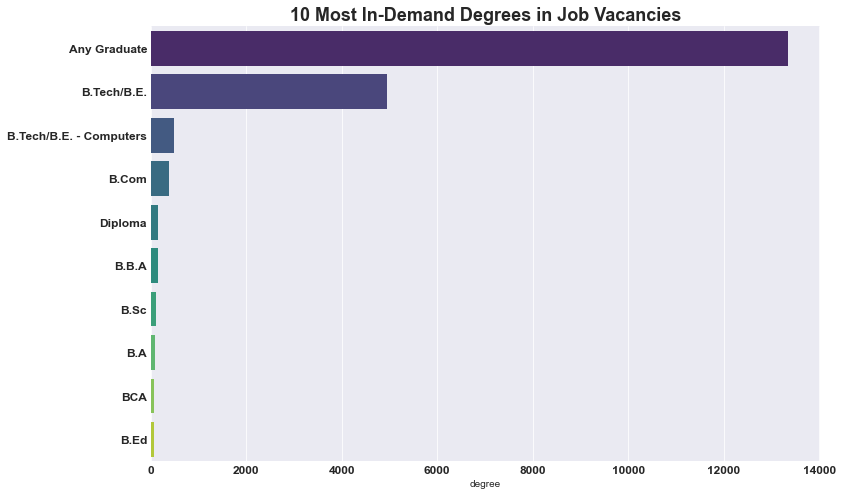

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(y=top_10_degree.index,x=top_10_degree.degree,palette='viridis')
plt.title("10 Most In-Demand Degrees in Job Vacancies",weight='bold',size=18)
plt.xticks(size=12,weight='bold')
plt.yticks(size=12,weight='bold')
plt.show()

Based on the chart provided above, it is evident that a majority of job vacancies do not require a specific specialization and are open to candidates with degrees in any field. However, for positions that demand specific expertise, the most sought-after bachelor's degrees are Bachelor of Technology, Bachelor of Engineering, and Bachelor of Commerce.

#### Analysising the "Industry" Coloumn

In [34]:
# Checking the missing values

df.industry.isnull().sum()

5

In [35]:
df[df.industry.isnull()]

,company,education,experience,industry,joblocation_address,numberofpositions,payrate,skills,min_year_exp,max_year_exp,degree
3768,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
4026,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
4389,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
4841,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
18578,RBS India Development Centre (P) Ltd.,UG: Any Graduate - Any Specialization,2 - 5 yrs,NaN,"Gurgaon , haryana",NaN,NaN,NaN,2,5,Any Graduate


In [36]:
# Replacing NaN values with the mode

df.industry.fillna(df.industry.mode()[0],inplace=True)
df.industry.isnull().sum()

0

In [43]:
# to display the 15 most popular industries in Job Vacancies

display(pd.DataFrame(df.industry.value_counts()[:15]).style.background_gradient(cmap="Greys"))

,industry
IT-Software / Software Services,9221
Education / Teaching / Training,1322
BPO / Call Centre / ITES,1254
Banking / Financial Services / Broking,1238
Recruitment / Staffing,1129
Internet / Ecommerce,738
Pharma / Biotech / Clinical Research,525
Medical / Healthcare / Hospitals,495
Automobile / Auto Anciliary / Auto Components,478
Construction / Engineering / Cement / Metals,449


With over 9000 job openings, it's evident that the Technology industry stands out as the most sought-after sector. The demand in this field significantly surpasses any other industry, with the closest contender being Education/Teaching/Training, followed closely by BPO/Call Centre/ITES.

#### Analysising the "Job Address" Coloumn

In [44]:
df.joblocation_address.head()

0                                              Chennai
1                                              Chennai
2                                            Bengaluru
3    Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...
4                                            Bengaluru
Name: joblocation_address, dtype: object

In [46]:
df.joblocation_address.value_counts()[:15]

Bengaluru/Bangalore                            3775
Mumbai                                         2348
Bengaluru                                      1453
Hyderabad / Secunderabad                       1246
Chennai                                        1204
Hyderabad                                       936
Noida                                           775
Delhi                                           763
Gurgaon                                         743
Mumbai , Mumbai                                 514
Delhi/NCR(National Capital Region)              383
Bengaluru/Bangalore , Bengaluru / Bangalore     360
Delhi , Delhi                                   324
Noida , Noida/Greater Noida                     313
Gurgaon , Gurgaon                               148
Name: joblocation_address, dtype: int64

In [47]:
df.joblocation_address.isnull().sum()

501

In [48]:
# I'm going to fill the NaN values with "Not Mentioned." 
# The reason for not using the mode (most common value) is that there are a substantial number of missing values, 
# and they can vary greatly. I want to ensure that filling the missing values doesn't impact the focus of our analysis.

df.joblocation_address.fillna('Not Mentioned',inplace=True)

In [49]:
# There are certain addresses with equivalent meanings but different names, such as "Bengalore" and "Bengaluru." 
# We will correct this inconsistency to ensure uniformity in the data.

df['loc']=df.joblocation_address
df['loc']=df['loc'].apply(lambda x:x.replace("Bengaluru/Bangalore","Bengaluru"))
df['loc']=df['loc'].apply(lambda x:x.replace("Bangalore","Bengaluru"))
df['loc']=df['loc'].apply(lambda x:x.replace("Bengaluru/Bangalore , Bengaluru / Bangalore","Bengaluru"))
df['loc']=df['loc'].apply(lambda x:x.replace("Mumbai , Mumbai","Mumbai"))
df['loc']=df['loc'].apply(lambda x:x.replace("Delhi , Delhi","Delhi"))
df['loc']=df['loc'].apply(lambda x:x.replace("Delhi/NCR(National Capital Region)","Delhi"))
df['loc']=df['loc'].apply(lambda x:x.replace("Delhi/NCR(National Capital Region)","Delhi"))
df['loc']=df['loc'].apply(lambda x:x.replace("Noida , Noida/Greater Noida","Noida"))
df['loc']=df['loc'].apply(lambda x:x.replace("Gurgaon , Gurgaon","Gurgaon"))
df['loc']=df['loc'].apply(lambda x:x.replace("Bengaluru , Bengaluru / Bangalore","Bengaluru"))
df['loc']=df['loc'].apply(lambda x:x.replace("Hyderabad / Secunderabad , Hyderabad/Secunderabad","Hyderabad / Secunderabad"))
df['loc']=df['loc'].apply(lambda x:x.replace("Hyderabad / Secunderabad","Hyderabad"))
df['loc']=df['loc'].apply(lambda x:x.replace("Delhi NCR","Delhi"))
df['loc']=df['loc'].apply(lambda x:x.replace("Bengaluru / Bangalore","Bengaluru"))
df['loc']=df['loc'].apply(lambda x:x.replace("Delhi/NCR","Delhi"))
df['loc']=df['loc'].apply(lambda x:x.replace("Greater Noida","Noida"))
df['loc']=df['loc'].apply(lambda x:x.replace("Greater Noida","Noida"))
df['loc']=df['loc'].apply(lambda x:x.replace('Noida/Noida',"Noida"))
df['loc']=df['loc'].apply(lambda x:x.replace("mumbai","Mumbai"))
df['loc']=df['loc'].apply(lambda x:x.replace("Hyderabad/Secunderabad","Hyderabad"))
df['loc']=df['loc'].apply(lambda x:x.replace("Bengaluru / Bengaluru","Bengaluru"))

In [50]:
# It appears that some jobs are available in multiple locations. 
# To prepare for visualization, we'll need to split the values in this column to ensure accurate representation.

address=[]
df['loc']=df['loc'].apply(lambda x:x.replace(" , ",", "))
df['loc']=df['loc'].apply(lambda x:x.split(", "))
df['loc']

0                                                [Chennai]
1                                                [Chennai]
2                                              [Bengaluru]
3        [Mumbai, Bengaluru, Kolkata, Chennai, Coimbato...
4                                              [Bengaluru]
                               ...                        
21995                                          [Bengaluru]
21996                                 [Bengaluru, Gurgaon]
21997                                          [Bengaluru]
21998                                   [Delhi, Bengaluru]
21999                                          [Bengaluru]
Name: loc, Length: 22000, dtype: object

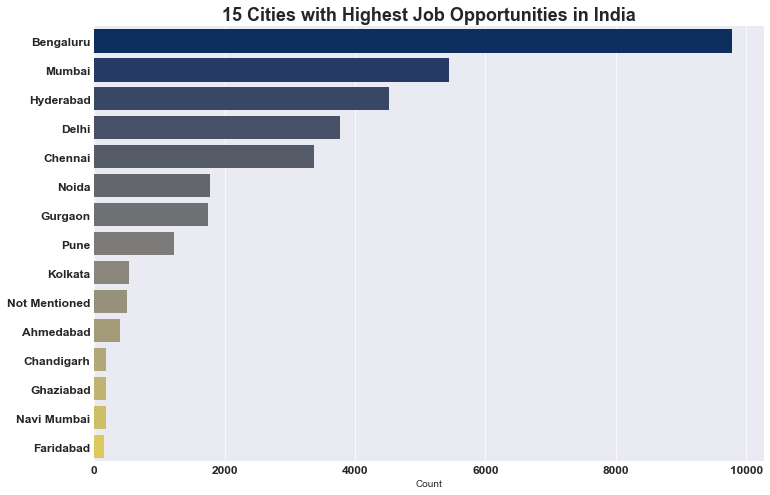

In [51]:
# Next, we will extract each location in each row using the "explode" function. 
# This will help us analyze and visualize the data more effectively, especially when jobs are available in multiple locations.

x=df['loc'].explode()
top_15_location=pd.DataFrame(x.value_counts()[:15])
top_15_location.columns=["Count"]

plt.figure(figsize=(12,8))
sns.barplot(y=top_15_location.index,x=top_15_location.Count,palette="cividis")
plt.title("15 Cities with Highest Job Opportunities in India",weight='bold', size=18)
plt.xticks(size=12,weight='bold')
plt.yticks(size=12,weight='bold')
plt.show()


Based on the presented data, Bengaluru emerges as the city with the highest job opportunities in India, followed by Mumbai, Hyderabad, and Delhi. This outcome is expected, as these cities are among the most densely populated areas in India, which naturally leads to more job opportunities.

#### Analysising the "Number of Positions" Coloumn

In [52]:
df.numberofpositions.value_counts()

1.0      1108
2.0       777
5.0       378
10.0      375
3.0       325
         ... 
86.0        1
57.0        1
55.0        1
125.0       1
126.0       1
Name: numberofpositions, Length: 84, dtype: int64

In [53]:
# Checking the missing values

df.numberofpositions.isnull().sum()

17536


It seems that there are numerous null values in this column, likely due to the fact that only one job is available for certain positions. To address this, we will fill the null values with the number 1, signifying that at least one job is available for these positions.

In [54]:
df.numberofpositions.fillna(1,inplace=True)
df.numberofpositions=df.numberofpositions.astype(int)
df.numberofpositions

0         1
1        60
2         1
3         1
4         4
         ..
21995     2
21996     1
21997     1
21998     1
21999     1
Name: numberofpositions, Length: 22000, dtype: int32

In [56]:
number_of_position=pd.DataFrame(df.numberofpositions)

# I am temporarily replacing values in the range of 10 to 49 with the value 49. 
# Later, I will replace these values with the range representation "[10,49].

number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>=10) 
                                              & (number_of_position.numberofpositions<50),49,
                                              number_of_position.numberofpositions)

# I am temporarily replacing values in the range of 50 to 99 with the value 99. 
# Later, I will replace these values with the range representation "[50,99]."

number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>=50) 
                                              & (number_of_position.numberofpositions<100),99,
                                              number_of_position.numberofpositions)
# I am temporarily replacing values in the range of 100 to 999 with the value 101. 
# Later, I will replace these values with the range representation "[100-999]."

number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>=100) 
                                              & (number_of_position.numberofpositions<1000),101,
                                              number_of_position.numberofpositions) 

# I am temporarily replacing values greater than or equal to 1000 with the value 1000. 
# Later, I will replace these values with the range representation "[1000,]" to indicate values equal to or greater than 1000.

number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>1000) 
                                              | (number_of_position.numberofpositions==1000),1000,
                                              number_of_position.numberofpositions)

In [57]:
number_of_position.numberofpositions=number_of_position.numberofpositions.astype(int)
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:str(x).replace("49","[10,49]"))
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:x.replace("99","[50,99]"))
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:x.replace("101","[100,999]"))
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:x.replace("1000","[1000,]"))

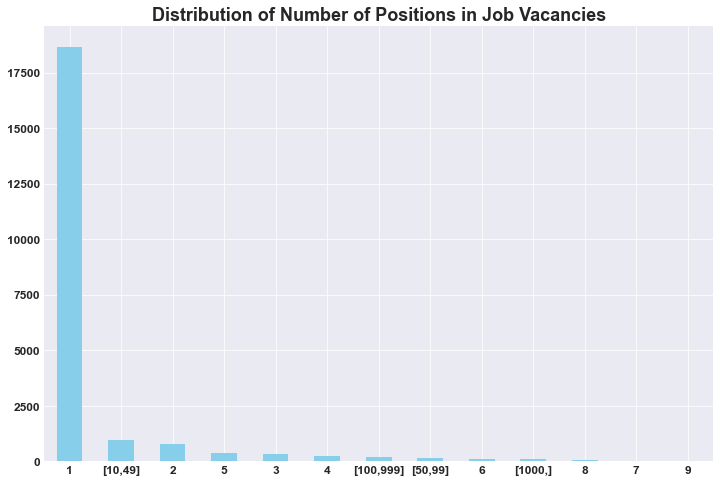

In [58]:
plt.figure(figsize=(12,8))
number_of_position.numberofpositions.value_counts().plot(kind='bar',color='skyblue')
plt.xticks(rotation=360,size=12,weight='bold')
plt.yticks(size=12,weight='bold')
plt.title("Distribution of Number of Positions in Job Vacancies",size=18,weight='bold')
plt.show()


Based on the graph presented above, it's evident that most job vacancies are limited to just one available position. However, it's important to note that there is some uncertainty surrounding this number, as we had to fill more than 17,500 missing values with the value "1" to complete the dataset.

#### Analysising the "Skills" Coloumn

In [59]:
df.skills.value_counts()

IT Software - Application Programming      5989
Sales                                      2893
ITES                                       1640
Teaching                                   1091
HR                                          928
Marketing                                   868
Accounts                                    860
Production                                  667
Medical                                     418
Financial Services                          413
IT Software - Other                         407
Engineering Design                          382
IT Software - Network Administration        372
IT Software - ERP                           354
IT Software - QA & Testing                  342
IT Software - eCommerce                     336
Site Engineering                            322
IT Software - DBA                           273
IT Software - Embedded                      262
IT Hardware                                 253
Journalism                              

In [60]:
df.skills.isnull().sum()

528

Let's examine the data entries that have missing values in the "skills" column. This will help us identify and address any gaps or incomplete information in this specific column.

In [62]:
df[df.skills.isnull()][:5]

,company,education,experience,industry,joblocation_address,numberofpositions,payrate,skills,min_year_exp,max_year_exp,degree,loc
68,Manipal-City & Guilds (MCG),UG: Any Graduate PG:Post Graduation Not Requir...,2 - 5 yrs,Education / Teaching / Training,Bengaluru,1,Not Disclosed by Recruiter,NaN,2,5,Any Graduate,[Bengaluru]
128,Delight HR Services Pvt Ltd.,UG: Any Graduate - Any Specialization PG:Post ...,2 - 5 yrs,Other,Bengaluru,1,"2,50,000 - 3,50,000 P.A",NaN,2,5,Any Graduate,[Bengaluru]
176,Synophic Systems Inc,"UG: B.Tech/B.E. - Any Specialization, B.Sc - A...",7 - 12 yrs,Telecom/ISP,Bengaluru,1,"6,50,000 - 13,00,000 P.A. Negotiable",NaN,7,12,"B.Tech/B.E., B.Sc - Any Specialization, BCA - ...",[Bengaluru]
182,Crystal Hiring Pvt. Ltd.,UG: Any Graduate - Any Specialization,7 - 12 yrs,IT-Software / Software Services,"Mumbai, Bengaluru",1,"6,00,000 - 12,00,000 P.A",NaN,7,12,Any Graduate,"[Mumbai, Bengaluru]"
206,Amogh Software Solutions Pvt Ltd hiring for Le...,UG: Any Graduate - Any Specialization,3 - 7 yrs,Banking / Financial Services / Broking,Bengaluru,1,Not Disclosed by Recruiter,NaN,3,7,Any Graduate,[Bengaluru]



Let's examine the "industry" column in the data above. It's apparent that the industry is quite diverse. Therefore, instead of filling missing values in the "skills" column with the mode (most common value) from the entire dataset, I plan to impute skills with the mode of skills related to each specific industry. This approach will result in more accurate and industry-specific skill assignments.

In [63]:

mode_skills=[]
for industry in df.industry.unique():
    mode=df[df['industry']==industry][['skills','company']].groupby(['skills']).count().sort_values(by='company',ascending=False).index[0]
    mode_skills.append(mode)

In [64]:
zip_iterator=zip(df.industry.unique().tolist(),mode_skills)
dict_ind_skills=dict(zip_iterator)
dict_ind_skills

{'Media / Entertainment / Internet': 'Sales',
 'Advertising / PR / MR / Event Management': 'Marketing',
 'IT-Software / Software Services': 'IT Software - Application Programming',
 'Banking / Financial Services / Broking': 'Sales',
 'Aviation / Aerospace Firms': 'Production',
 'Industrial Products / Heavy Machinery': 'Sales',
 'FMCG / Foods / Beverage': 'Sales',
 'Recruitment / Staffing': 'HR',
 'Internet / Ecommerce': 'IT Software - Application Programming',
 'Travel / Hotels / Restaurants / Airlines / Railways': 'Hotels',
 'BPO / Call Centre / ITES': 'ITES',
 'Pharma / Biotech / Clinical Research': 'Production',
 'Real Estate / Property': 'Sales',
 'Insurance': 'Sales',
 'Facility Management': 'Sales',
 'Publishing': 'Sales',
 'Education / Teaching / Training': 'Teaching',
 'Retail / Wholesale': 'Sales',
 'Automobile / Auto Anciliary / Auto Components': 'Production',
 'Chemicals / PetroChemical / Plastic / Rubber': 'Sales',
 'Government / Defence': 'Engineering Design',
 'Accounting


We have successfully created a dictionary containing industry categories and the most essential skills required for each specific industry. This dictionary will be valuable for skill imputation based on industry, ensuring a more precise match between job requirements and the necessary skills.

In [65]:

for i in range(len(df)):
    if pd.isnull(df.skills[i]):
        df.skills[i]=dict_ind_skills[df.industry[i]]

In [66]:
df.skills.isnull().sum()

0

Having successfully imputed the data, our next step is to retrieve the 20 most in-demand skills. These skills are essential for understanding the key qualifications sought after by employers in our dataset.

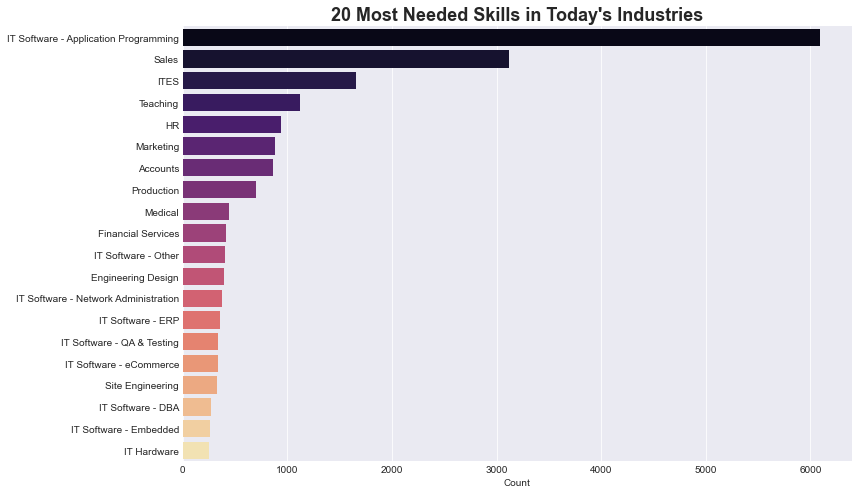

In [67]:
top_20_skills=pd.DataFrame(df['skills'].value_counts()[:20])
top_20_skills.columns=['Count']
plt.figure(figsize=(12,8))
sns.barplot(y=top_20_skills.index,x=top_20_skills.Count,palette='magma')
plt.title("20 Most Needed Skills in Today's Industries",weight='bold',size=18)
plt.show()


Based on the chart presented above, it's evident that the most sought-after skills in today's industry include IT Software - Application Programming, Sales, and ITES. These skills are in high demand, highlighting their significance in the job market.

#### Analysising the "Pay Rate" Coloumn

In [68]:
df.payrate[:10]

0           1,50,000 - 2,25,000 P.A
1    1,50,000 - 2,50,000 P.A. 20000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
5        Not Disclosed by Recruiter
6           3,00,000 - 6,50,000 P.A
7        Not Disclosed by Recruiter
8           1,00,000 - 2,00,000 P.A
9        Not Disclosed by Recruiter
Name: payrate, dtype: object

In [69]:
df.payrate.isnull().sum()

97


At this point, we will fill the NaN (missing) values in the data with the placeholder "Not Disclosed by Recruiter." This will provide a standardized representation for undisclosed information within the dataset.

In [70]:
df.payrate.fillna("Not Disclosed by Recruiter",inplace=True)
df.payrate.value_counts()

Not Disclosed by Recruiter                                                  15946
Pay Band: PB4 (Rs.3740067000) with Academic Grade Pay of Rs.10,500/p.m.       121
Pay Band: PB4 (Rs.3740067000) with Academic Grade Pay of Rs.9,500/p.m.        116
Best in the Industry                                                           87
Pay Band: PB3 (Rs.15600-39100) with Academic Grade Pay of Rs.8,000/p. m.       84
                                                                            ...  
Negotiable for Good Candidates                                                  1
1,00,000 - 6,00,000 P.A. + variables                                            1
3,00,000 - 4,50,000 P.A. As Per Restaurant Policy                               1
5,00,000 - 8,00,000 P.A. Best in the Industry                                   1
8,50,000 - 14,00,000 P.A                                                        1
Name: payrate, Length: 1848, dtype: int64

We've observed that the majority of job vacancies do not specify the pay rate for the job positions. To gain a better understanding, let's determine the percentage of job listings that lack this information.

In [72]:
print("The percentage of job vacancies with not Pay Rate information is:",df.payrate.value_counts()[0]/len(df.payrate))

The percentage of job vacancies with not Pay Rate information is: 0.7248181818181818



The percentage of missing pay rate information is exceptionally high, which means we won't conduct further analysis on this column. It's impractical to derive meaningful insights from data with such a significant number of missing values.

#### Analysising the "Company" Coloumn

In [73]:
df.company.value_counts()

Indian Institute of Technology Bombay                                                                         403
Confidential                                                                                                  393
National Institute of Industrial Engineering                                                                  185
Oracle India Pvt. Ltd.                                                                                        151
JPMorgan Chase                                                                                                135
                                                                                                             ... 
Bello Jewels Pvt Ltd                                                                                            1
ITG Telematics Pvt Ltd                                                                                          1
Genuine Management Services Pvt. Limited hiring for Leading Client of Genuine Management

In [74]:
df.company.isnull().sum()

4

We will address the missing values in this column by imputing them with the label "Confidential." This will ensure consistent representation of undisclosed data.

In [75]:
df.company.fillna("Confidential",inplace=True)

df.company.isnull().sum()

0

Our next step is to retrieve information on the top 15 companies offering the most job opportunities in India. This data will provide valuable insights into the job market and the companies that are actively hiring.

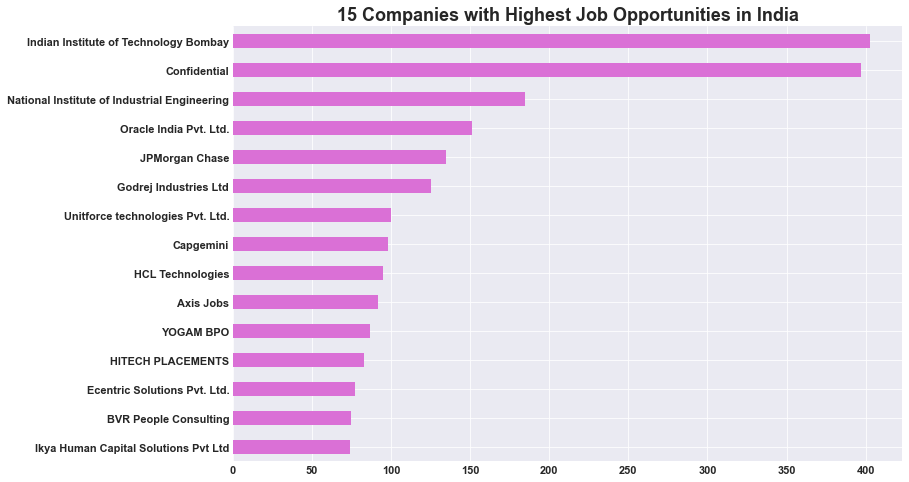

In [80]:
plt.figure(figsize=(12,8))
df.company.value_counts()[:15].sort_values().plot(kind='barh',color='orchid')
plt.title("15 Companies with Highest Job Opportunities in India",size=18,weight='bold')
plt.xticks(size=11,weight='bold')
plt.yticks(size=11,weight='bold')
plt.show()

We have successfully obtained the list of the top 15 companies with the highest job opportunities in India. Notably, three of these companies are Indian Institute of Technology Bombay, National Institute of Industrial Engineering, and Oracle India Pvt. Ltd. These companies offer significant employment prospects in the Indian job market.

#### Most Needed Skill For A Particular Industry


This section is designed to assist job applicants in preparing the necessary skills if they intend to pursue a career in a particular industry. It provides valuable insights into the skills in high demand for specific job sectors, aiding individuals in their career preparations.

In [81]:

mode_skills=[]
for industry in df.industry.unique():
    mode=df[df['industry']==industry][['skills','company']].groupby(['skills']).count().sort_values(by='company',ascending=False).index[0]
    mode_skills.append(mode)

In [ ]:
# pd.set_option('max_rows',100)
# pd.DataFrame(mode_skills,data.industry.unique().tolist(),columns=["Most Needed Skill"])[:63]

In [84]:
pd.set_option('display.max_rows', 100)
pd.DataFrame(mode_skills, index=df.industry.unique().tolist(), columns=["Most Needed Skill"])[:63]


,Most Needed Skill
Media / Entertainment / Internet,Sales
Advertising / PR / MR / Event Management,Marketing
IT-Software / Software Services,IT Software - Application Programming
Banking / Financial Services / Broking,Sales
Aviation / Aerospace Firms,Production
Industrial Products / Heavy Machinery,Sales
FMCG / Foods / Beverage,Sales
Recruitment / Staffing,HR
Internet / Ecommerce,IT Software - Application Programming
Travel / Hotels / Restaurants / Airlines / Railways,Hotels


#### Average Minimum and Maximum Year Of Experience for Each Industry 


This information provides valuable insights for job seekers in finding a job that aligns with their years of experience. By understanding the industry-specific skills in demand, job seekers can better match their qualifications and experience with job opportunities in their desired sector.

In [89]:
pd.set_option('display.max_rows', 70)
summary_df = df[['industry', 'min_year_exp', 'max_year_exp']].groupby(['industry']).mean().sort_values(by='min_year_exp')
styled_summary = summary_df.style.background_gradient(cmap='coolwarm')
styled_summary


,min_year_exp,max_year_exp
industry,,
Fresher / Trainee / Entry Level,0.055556,2.222222
Wellness / Fitness / Sports / Beauty,1.000000,4.250000
Leather,1.000000,3.000000
BPO / Call Centre / ITES,1.731260,5.175439
Government / Defence,2.315789,6.894737
Publishing,2.386364,5.636364
Wellness / Fitness / Sports,2.400000,5.066667
Travel / Hotels / Restaurants / Airlines / Railways,2.428184,5.769648
Advertising / PR / MR / Event Management,2.454183,5.709163


From the results presented above, we can observe that certain industries tend to require relatively shorter years of experience, such as Fresher/Trainee/Entry Level, Wellness/Fitness/Sports/Beauty, and Leather. On the other hand, there are industries that typically demand a substantial number of years of experience, including Tyres, Pulp and Paper, and Medical Devices/Equipment. This information can be invaluable for job applicants looking to match their experience levels with specific industry requirements.

## Job Reccomendation ##


In this section, I aim to create an interactive function that enables users to search for job listings based on various criteria, including years of experience, degree, skills, and location. This function will provide an engaging and user-friendly way for individuals to find job opportunities that align with their qualifications and preferences.

In [91]:
#@interact
#def job_reccomendation(min_exp=range(0,25),max_exp=range(0,27),degree=list(df.degree.unique()),skills=df.skills.unique(),loc=list(x.unique())):
    #bool_loc=[]
    #for i in range(len(df)):
        #if np.isin(loc,df['loc'][i]): bool_loc.append(bool(1))
        #else : bool_loc.append(bool(0))
    #y=df[(df["min_year_exp"]>=min_exp)&(df["max_year_exp"]<=max_exp)&(df["degree"]==degree)&(df["skills"]==skills)&(pd.Series(bool_loc))][['company','loc','industry', 'degree', 'experience','skills','numberofpositions','payrate' ]].reset_index(drop=True)
    #return y

interactive(children=(Dropdown(description='min_exp', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [96]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from ipywidgets import interact

In [99]:
data = pd.DataFrame(df)

degree = widgets.Dropdown(options=data['degree'].unique(), description='Degree')
skills = widgets.Dropdown(options=data['skills'].unique(), description='Skills')
loc = widgets.SelectMultiple(options=data['loc'].apply(lambda x: ', '.join(x)).unique(), description='Location')

def job_reccomendation(min_exp, max_exp, degree, skills, loc):
    selected_loc = list(loc.value)  # Convert the selected locations to a list
    bool_loc = data['loc'].apply(lambda x: all(l in x for l in selected_loc))
    filtered_data = data[(data["min_year_exp"] >= min_exp) & (data["max_year_exp"] <= max_exp) & (data["degree"] == degree) & (data["skills"] == skills) & bool_loc]
    
    return filtered_data

output = widgets.Output()

@output.capture(clear_output=True, wait=True)
def update_recommendation(min_exp, max_exp, degree, skills):
    result = job_reccomendation(min_exp, max_exp, degree, skills, loc)
    if not result.empty:
        display(result)
    else:
        print("No recommendations found.")

interact(update_recommendation, min_exp=widgets.IntSlider(min=0, max=10, step=1, value=0), max_exp=widgets.IntSlider(min=0, max=10, step=1, value=10), degree=degree, skills=skills, loc=loc)
display(output)

interactive(children=(IntSlider(value=0, description='min_exp', max=10), IntSlider(value=10, description='max_…

Output()